Index(['Unnamed: 0', 'Currency', 'Date', 'Closing Price (USD)',
       '24h Open (USD)', '24h High (USD)', '24h Low (USD)'],
      dtype='object')
(2787, 7)
   Unnamed: 0 Currency        Date  Closing Price (USD)  24h Open (USD)  \
0           0      BTC  2014-03-14            124.65499       125.30466   
1           1      BTC  2014-03-15            126.45500       124.65499   
2           2      BTC  2014-03-16            109.58483       126.45500   
3           3      BTC  2014-03-17            119.67466       109.58483   
4           4      BTC  2014-03-18            122.33866       119.67466   

   24h High (USD)  24h Low (USD)  
0       125.75166      123.56349  
1       126.75850      124.63383  
2       126.66566       84.32833  
3       119.67500      108.05816  
4       122.93633      119.00566  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               

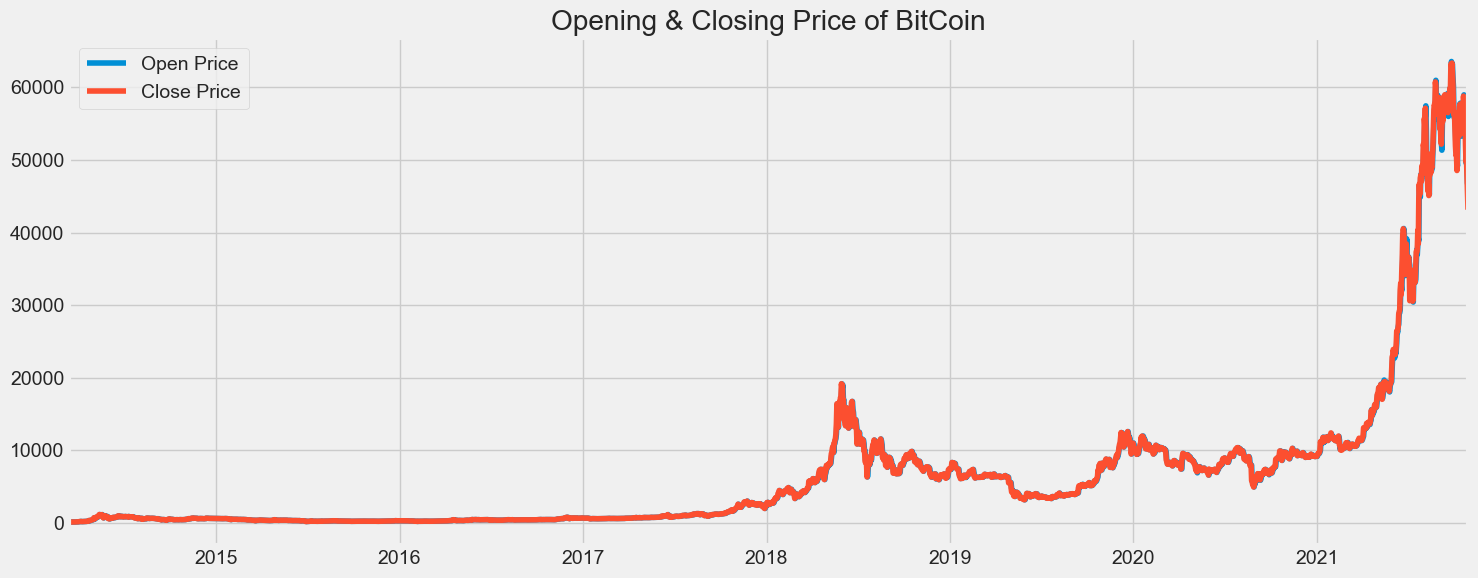

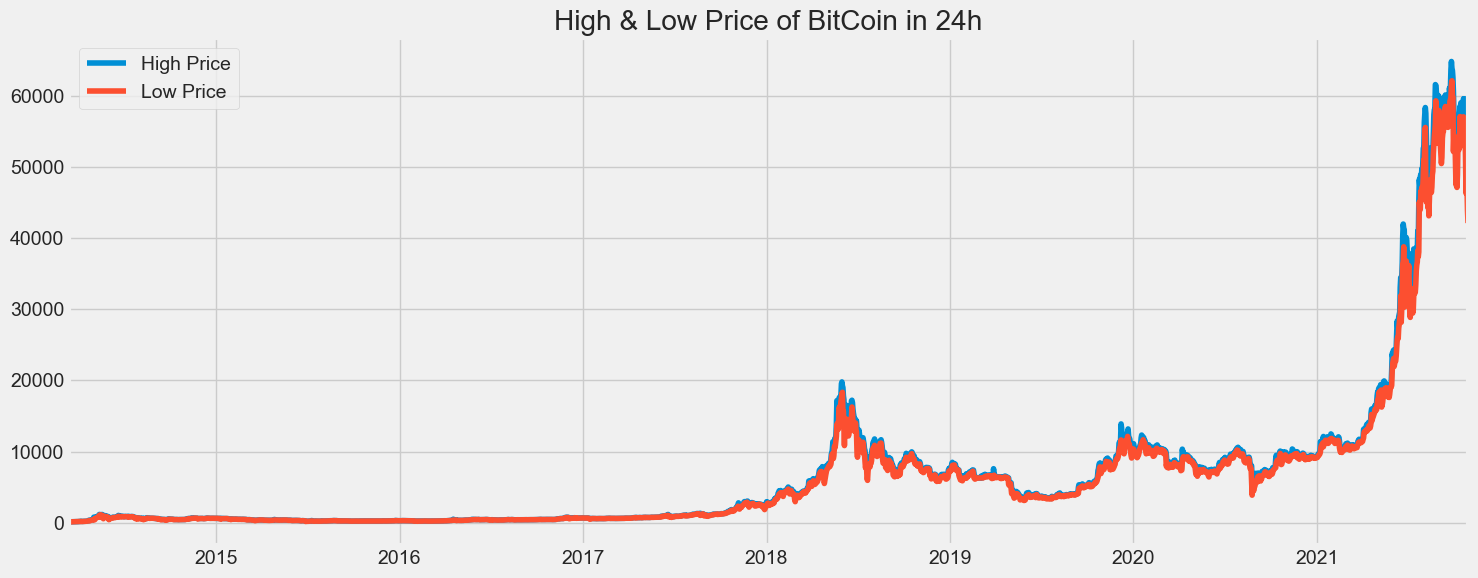

(2787, 1)
Train Size : 2090 Test Size : 697
(2090, 1)
X_train:  [array([[0.00023831],
       [0.00026677],
       [0.        ],
       [0.00015955],
       [0.00020168],
       [0.00019087],
       [0.0002089 ],
       [0.00022847],
       [0.00024454],
       [0.00027478],
       [0.000264  ],
       [0.00027424],
       [0.00028145],
       [0.00042154],
       [0.0003893 ],
       [0.00054047],
       [0.00046394],
       [0.00054345],
       [0.00069526],
       [0.0008184 ],
       [0.00088127],
       [0.00109188],
       [0.00126051],
       [0.00145666],
       [0.00113492],
       [0.00105074],
       [0.00109288],
       [0.00124252],
       [0.00133103],
       [0.00140445],
       [0.00138271],
       [0.00141471],
       [0.00142869],
       [0.00145416],
       [0.00160856],
       [0.00184122],
       [0.00220861],
       [0.00243115],
       [0.00293971],
       [0.00351873],
       [0.00280373],
       [0.00310564],
       [0.00362996],
       [0.00393584],
       [0.0

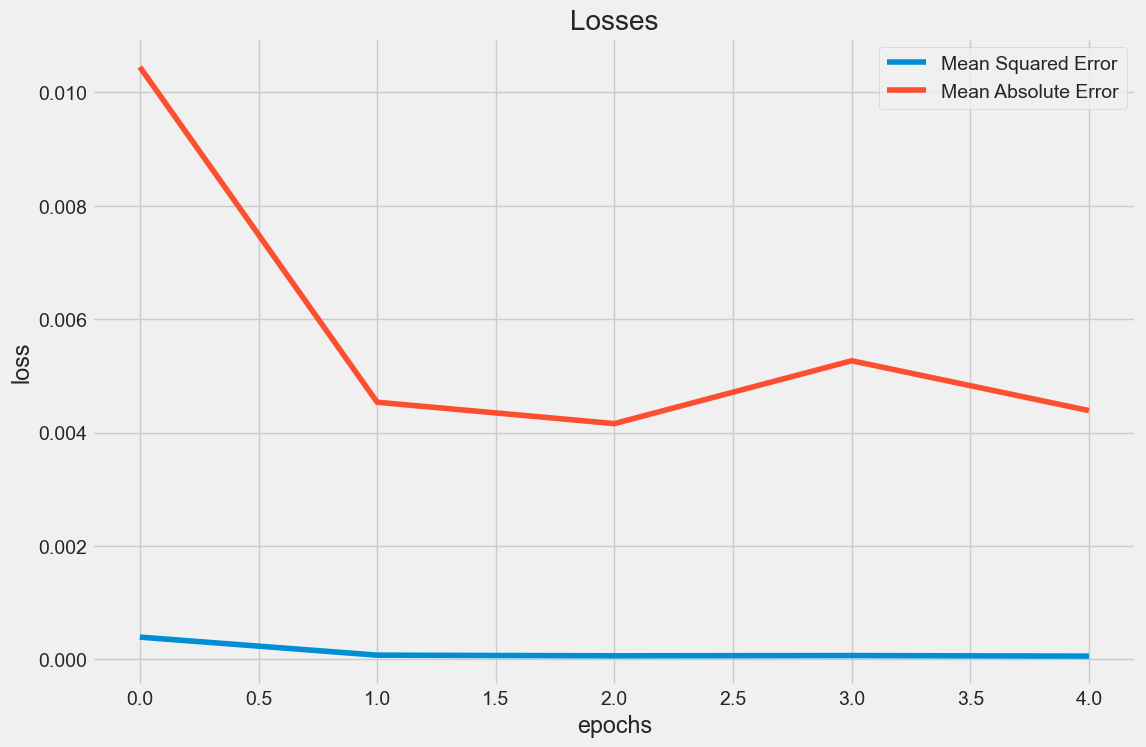

22/22 [==============================] - 2s 25ms/step
(697, 1)
2882.86
      Predictions       Actuals
0     8187.479980   9907.407965
1     8360.883789  10462.412169
2     8582.653320  10844.570975
3     8845.819336  10997.459750
4     9119.051758  11666.409684
..            ...           ...
692  45167.191406  49765.132082
693  44205.164062  50033.693137
694  43159.402344  47886.625255
695  41973.914062  45605.615754
696  40632.460938  43145.471291

[697 rows x 2 columns]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from PyQt5 import QtWidgets

# Create a file dialog to select the CSV file
app = QtWidgets.QApplication([])
fname, _ = QtWidgets.QFileDialog.getOpenFileName(None, 'Open file', "", "CSV files (*.csv)")

# Check if a file was selected
if fname:
    try:
        # Read the CSV file using the extracted file path
        df = pd.read_csv(fname)
        
        # Process the data as needed
        print(df.columns)
        
        # Show a message box indicating successful file upload
        QtWidgets.QMessageBox.information(None, "Message", "File uploaded successfully")
    except Exception as e:
        # Show an error message if there was an issue reading the file
        QtWidgets.QMessageBox.critical(None, "Error", f"Error reading file: {str(e)}")
else:
    # Show a message if no file was selected
    QtWidgets.QMessageBox.warning(None, "Warning", "No file selected")
print(df.shape)
print(df.head())
print(df.info())
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)
plt.figure(figsize=(15, 6))
df[r'24h Open (USD)'].plot()
df[r'Closing Price (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of BitCoin")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 6))
df[r'24h High (USD)'].plot()
df[r'24h Low (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Price of BitCoin in 24h")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()
n_cols = 1
dataset = df[r"Closing Price (USD)"]
dataset = pd.DataFrame(dataset)
data = dataset.values

print(data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)
train_data = scaled_data[0:train_size, :]
print(train_data.shape)
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 5, batch_size= 32)
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))
x_test.shape , y_test.shape
# Get Prediction
predictions = model.predict(x_test)
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
print(RMSE)
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
print(preds_acts)